In [1]:
import pandas as pd
df = pd.read_excel(r"C:\Users\86135\Desktop\RC_Shear_Wall_Database_20240514.xlsx")
df.isnull().sum()

Num            127
Author           0
Specimen         0
FailureMode      0
τ/fc             0
              ... 
Moment37       429
Moment38       429
Moment39       429
Moment40       429
No               0
Length: 235, dtype: int64

In [2]:
# Count the number of missing values in each column
missing_count = df.isnull().sum()
# Count the proportion of missing values in each column
missing_ratio = df.isnull().mean()

print("===== Missing Value Count =====")
print(missing_count)
print("\n===== Missing Value Ratio =====")
print(missing_ratio)

# Sort the results to see the most missing columns
print("\n===== Sorted by Missing Ratio (Descending) =====")
print(missing_ratio.sort_values(ascending=False))

===== Missing Value Count =====
Num            127
Author           0
Specimen         0
FailureMode      0
τ/fc             0
              ... 
Moment37       429
Moment38       429
Moment39       429
Moment40       429
No               0
Length: 235, dtype: int64

===== Missing Value Ratio =====
Num            0.296037
Author         0.000000
Specimen       0.000000
FailureMode    0.000000
τ/fc           0.000000
                 ...   
Moment37       1.000000
Moment38       1.000000
Moment39       1.000000
Moment40       1.000000
No             0.000000
Length: 235, dtype: float64

===== Sorted by Missing Ratio (Descending) =====
Force40    1.0
Force36    1.0
Force38    1.0
Force39    1.0
Area36     1.0
          ... 
h          0.0
tw         0.0
lw0        0.0
as'        0.0
No         0.0
Length: 235, dtype: float64


In [3]:
# Delete all empty columns (columns with missing rate = 1.0)
df = df.dropna(axis=1, how='all')
print(df.columns.tolist())

['Num', 'Author', 'Specimen', 'FailureMode', 'τ/fc', 'Drift_at_yield', 'Drift_at_Max', 'θu', 'M/Vlw', 'lw/tw', 'ρvwFy,vw/fc', 'ρhwFy,vw/fc', 'ρvcFy,vc/fc', 'ρhcFy,hc/fc', 'P/fcAg', 'Section', 'Ab/Ag', 'Vtest/Ag/sqrt(fc)', 'V@M/Vn_GB', 'V@M/Vn_ACI', 'V@M/Vtest', 'Vn_GB/Vtest', 'Vn_ACI/Vtest', 'Vtest', 'Vn_ACI', 'Vn_GB', 'V@M', 'alpha_c', 'lamda', 'N', 'Vc', 'Vs', 'Mc', 'Ms', 'P', 'fc', 'ft', 'alpha1', 'beta1', 'lw', 'lb', "as'", 'lweb', 'lw0', 'tw', 'h', 'Aw', 'Ab', 'A', 'Ag', 'Fy,hw', 'Fy,vw', 'Fy,vc', 'Fy,hc', 'ρvw', 'ρhw', 'ρvc', 'ρhc', 's', 'Ash1', 'layer', 'Ash', 'Asw', 'Asv1', 'nv', 'Asv', 'V@moment', 'ForceEquilibrium', 'Moment', 'x_real', 'eps_cu', 'Ec', 'Es', 'DRein.1', 'DRein.2', 'DRein.3', 'DRein.4', 'DRein.5', 'DRein.6', 'DRein.7', 'DRein.8', 'DRein.9', 'DRein.10', 'DRein.11', 'DRein.12', 'DRein.13', 'DRein.14', 'DRein.15', 'DRein.16', 'DRein.17', 'DRein.18', 'DRein.19', 'DRein.20', 'DRein.21', 'DRein.22', 'DRein.23', 'DRein.24', 'DRein.25', 'DRein.26', 'DRein.27', 'DRein.28

Total number of raw NaNs： 48004
Does it exist NaN？ True
Does it exist inf？ False
Is there any left after cleaning NaN？ False
Is there any left after cleaning inf？ False
SMOTE 后类别分布： Counter({3: 150, 1: 150, 2: 150, 4: 150})


c:\program files\python37\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\program files\python37\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
c:\program files\python37\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


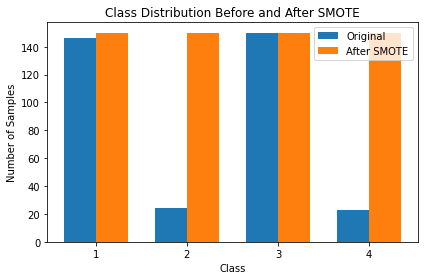

训练集 PCA 后形状： (600, 39)
测试集 PCA 后形状： (86, 39)


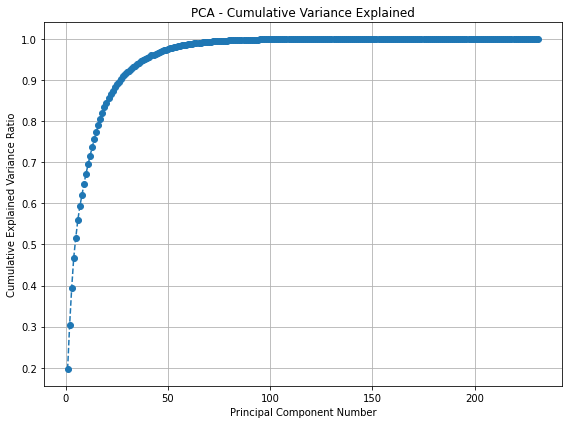

In [6]:
# 导入依赖包
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

# 1. Reading Data
df = pd.read_excel(r"C:\Users\86135\Desktop\RC_Shear_Wall_Database_20240514.xlsx")
# 2. One-hot encoding categorical variables
df_processed = pd.get_dummies(df.copy(), drop_first=True)
# 3. Replace inf → NaN and clean them uniformly
df_processed.replace([np.inf, -np.inf], np.nan, inplace=True)
print("Total number of raw NaNs：", df_processed.isna().sum().sum())
# Fill missing values with mean
df_processed.fillna(df_processed.mean(), inplace=True)
# 4. Features and tags
X = df_processed.drop(columns=['FailureMode'])
X = X.select_dtypes(include=['int64', 'float64'])  # Keep numeric columns
y = df_processed['FailureMode']
# 5. Divide the training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
# 6. standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 7. Check and clean the normalized data
print("Does it exist NaN？", np.isnan(X_train_scaled).any())
print("Does it exist inf？", np.isinf(X_train_scaled).any())
X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=0.0, neginf=0.0)
# Re-confirm the cleaning effect
print("Is there any left after cleaning NaN？", np.isnan(X_train_scaled).any())
print("Is there any left after cleaning inf？", np.isinf(X_train_scaled).any())
# 8. SMOTE 
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
print("SMOTE Post-class distribution：", Counter(y_train_res))
# 9. Visualize the before and after category changes
classes = sorted(Counter(y_train).keys())
orig_values = [Counter(y_train)[k] for k in classes]
resampled_values = [Counter(y_train_res)[k] for k in classes]
x_pos = np.arange(len(classes))
width = 0.35
fig, ax = plt.subplots()
ax.bar(x_pos - width/2, orig_values, width, label='Original')
ax.bar(x_pos + width/2, resampled_values, width, label='After SMOTE')
ax.set_xlabel('Class')
ax.set_ylabel('Number of Samples')
ax.set_title('Class Distribution Before and After SMOTE')
ax.set_xticks(x_pos)
ax.set_xticklabels(classes)
ax.legend()
plt.tight_layout()
plt.show()

# 10. PCA 降维保留 95% 信息
pca = PCA(n_components=0.95, random_state=42)
X_train_res_pca = pca.fit_transform(X_train_res)
X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=0.0, neginf=0.0)

X_test_pca = pca.transform(X_test_scaled)

print("训练集 PCA 后形状：", X_train_res_pca.shape)
print("测试集 PCA 后形状：", X_test_pca.shape)

# 11. 可视化累计解释方差
pca_full = PCA()
pca_full.fit(X_train_res)
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component Number')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Variance Explained')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv(r"C:\Users\86135\Desktop\processed_dataset.csv")

df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# One-hot 编码（如果有）
if 'Section' in df.columns:
    df = pd.get_dummies(df, columns=['Section'], drop_first=True)

# 标签编码
le = LabelEncoder()
y = le.fit_transform(df["FailureMode"])
X = df.drop(columns=["FailureMode"])

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 训练 XGBoost 模型
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=50,
    max_depth=3,
    random_state=42
)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 输出结果


from sklearn.metrics import classification_report, confusion_matrix

print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("✅ F1 Score:", round(f1_score(y_test, y_pred, average='weighted'), 3))
print("✅ Recall:", round(recall_score(y_test, y_pred, average='weighted'), 3))

print("\n✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in le.classes_]))

print("\n✅ Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))



✅ Accuracy: 0.849
✅ F1 Score: 0.84
✅ Recall: 0.849

✅ Classification Report:

              precision    recall  f1-score   support

           1       0.82      1.00      0.90        37
           2       0.25      0.17      0.20         6
           3       0.97      0.82      0.89        38
           4       0.80      0.80      0.80         5

    accuracy                           0.85        86
   macro avg       0.71      0.70      0.70        86
weighted avg       0.85      0.85      0.84        86


✅ Confusion Matrix:

[[37  0  0  0]
 [ 4  1  1  0]
 [ 3  3 31  1]
 [ 1  0  0  4]]


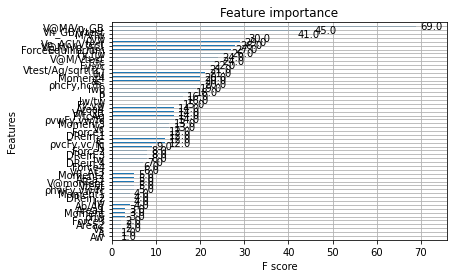

In [11]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model)
plt.show()


In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("CV Accuracy:", scores.mean())


CV Accuracy: 0.8042407660738714


In [13]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X_train, y_train)
model.fit(X_res, y_res)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, ...)

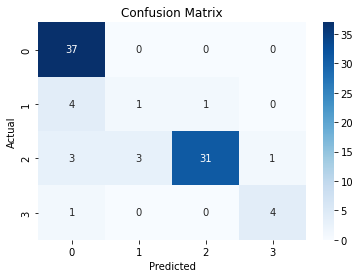

In [14]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
